# CH8: Dimensionality Reduction Exercises

10. Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2
dimensions and plot the result using Matplotlib. You can use a scatterplot using
10 different colors to represent each image’s target class. Alternatively, you can
replace each dot in the scatterplot with the corresponding instance’s class (a digit
from 0 to 9), or even plot scaled-down versions of the digit images themselves
(if you plot all digits the visualization will be too cluttered, so you should either
draw a random sample or plot an instance only if no other instance has already
been plotted at a close distance). You should get a nice visualization with wellseparated clusters of digits. Try using other dimensionality reduction algorithms,
such as PCA, LLE, or MDS, and compare the resulting visualizations.

In [71]:
from sklearn.manifold import TSNE,Isomap,MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,train_size=6/7,random_state=42,stratify=mnist.target)

In [44]:
X_trainS,y_trainS = X_train[:5000],y_train[:5000]

In [45]:
%%time
tsne = TSNE(n_components=2,init='random',learning_rate ='auto',random_state=42)
X_trainS_reduced = tsne.fit_transform(X_trainS)

CPU times: user 1min 26s, sys: 225 ms, total: 1min 26s
Wall time: 57.6 s


In [46]:
X_trainS_reduced.shape

(5000, 2)

In [47]:
X_trainS_reduced[0]

array([-59.65215 ,  18.364567], dtype=float32)

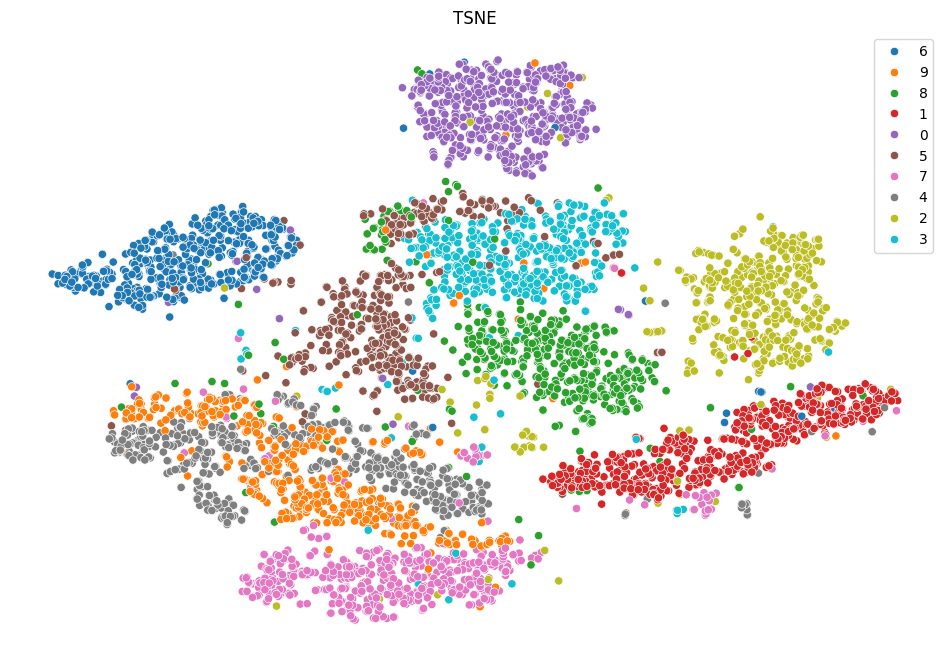

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_trainS_reduced[:,0],y=X_trainS_reduced[:,1],hue=y_trainS)
plt.title('TSNE')
plt.axis('off')
plt.show()

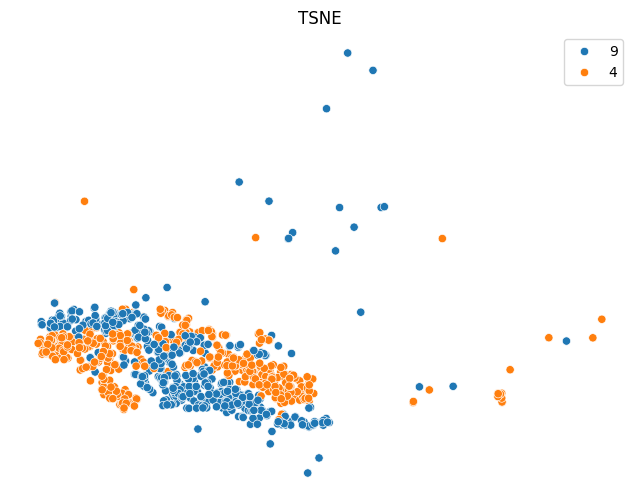

In [49]:
plt.figure(figsize=(8,6))
idx = (y_trainS == '4') | (y_trainS == '9')
sns.scatterplot(x=X_trainS_reduced[idx ,0],y=X_trainS_reduced[idx ,1],hue=y_trainS[idx])
plt.title('TSNE')
plt.axis('off')
plt.show()

In [50]:
X_trainSS = X_trainS[idx]
y_trainSS = y_trainS[idx]
tsne_subset = TSNE(n_components=2,init='random',learning_rate ='auto',random_state=42)
X_trainSS = tsne_subset.fit_transform(X_trainSS)

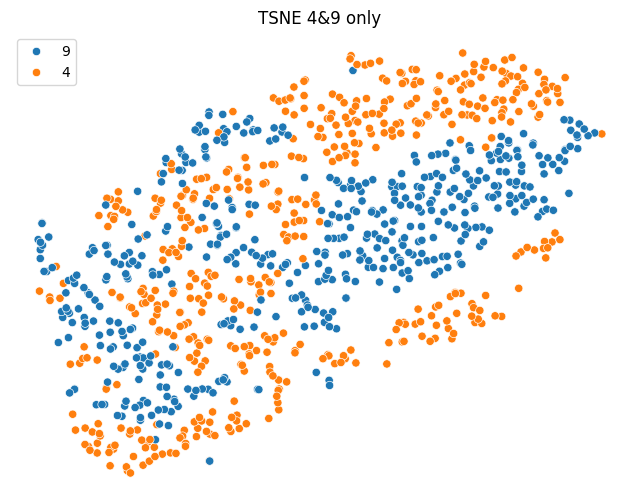

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_trainSS[: ,0],y=X_trainSS[: ,1],hue=y_trainSS)
plt.title('TSNE 4&9 only')
plt.axis('off')
plt.show()

In [60]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.tab10
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
            closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
            if closest_distance > min_distance:
                neighbors = np.r_[neighbors, [image_coord]]
                if images is None:
                    plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                            color=cmap(float(y[index]) / 9),
                            fontdict={"weight": "bold", "size": 16})
                else:
                    image = images[index].reshape(28, 28)
                    imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                              image_coord)
                    ax.add_artist(imagebox)


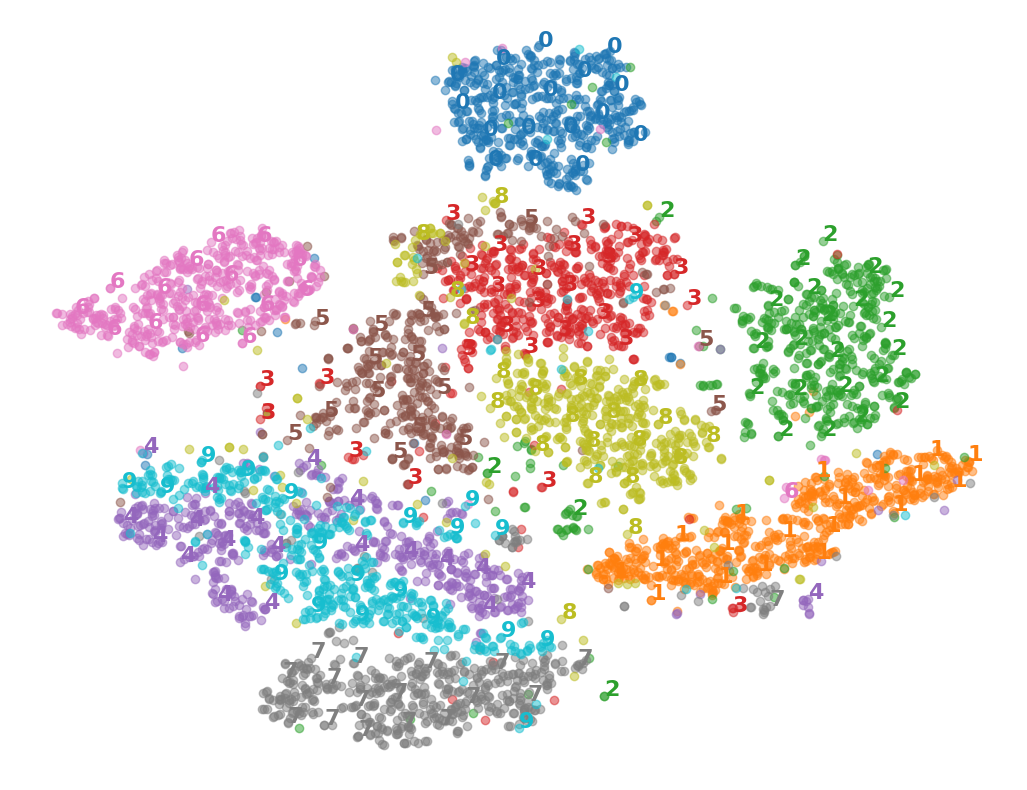

In [61]:
plot_digits(X_trainS_reduced,y_trainS)

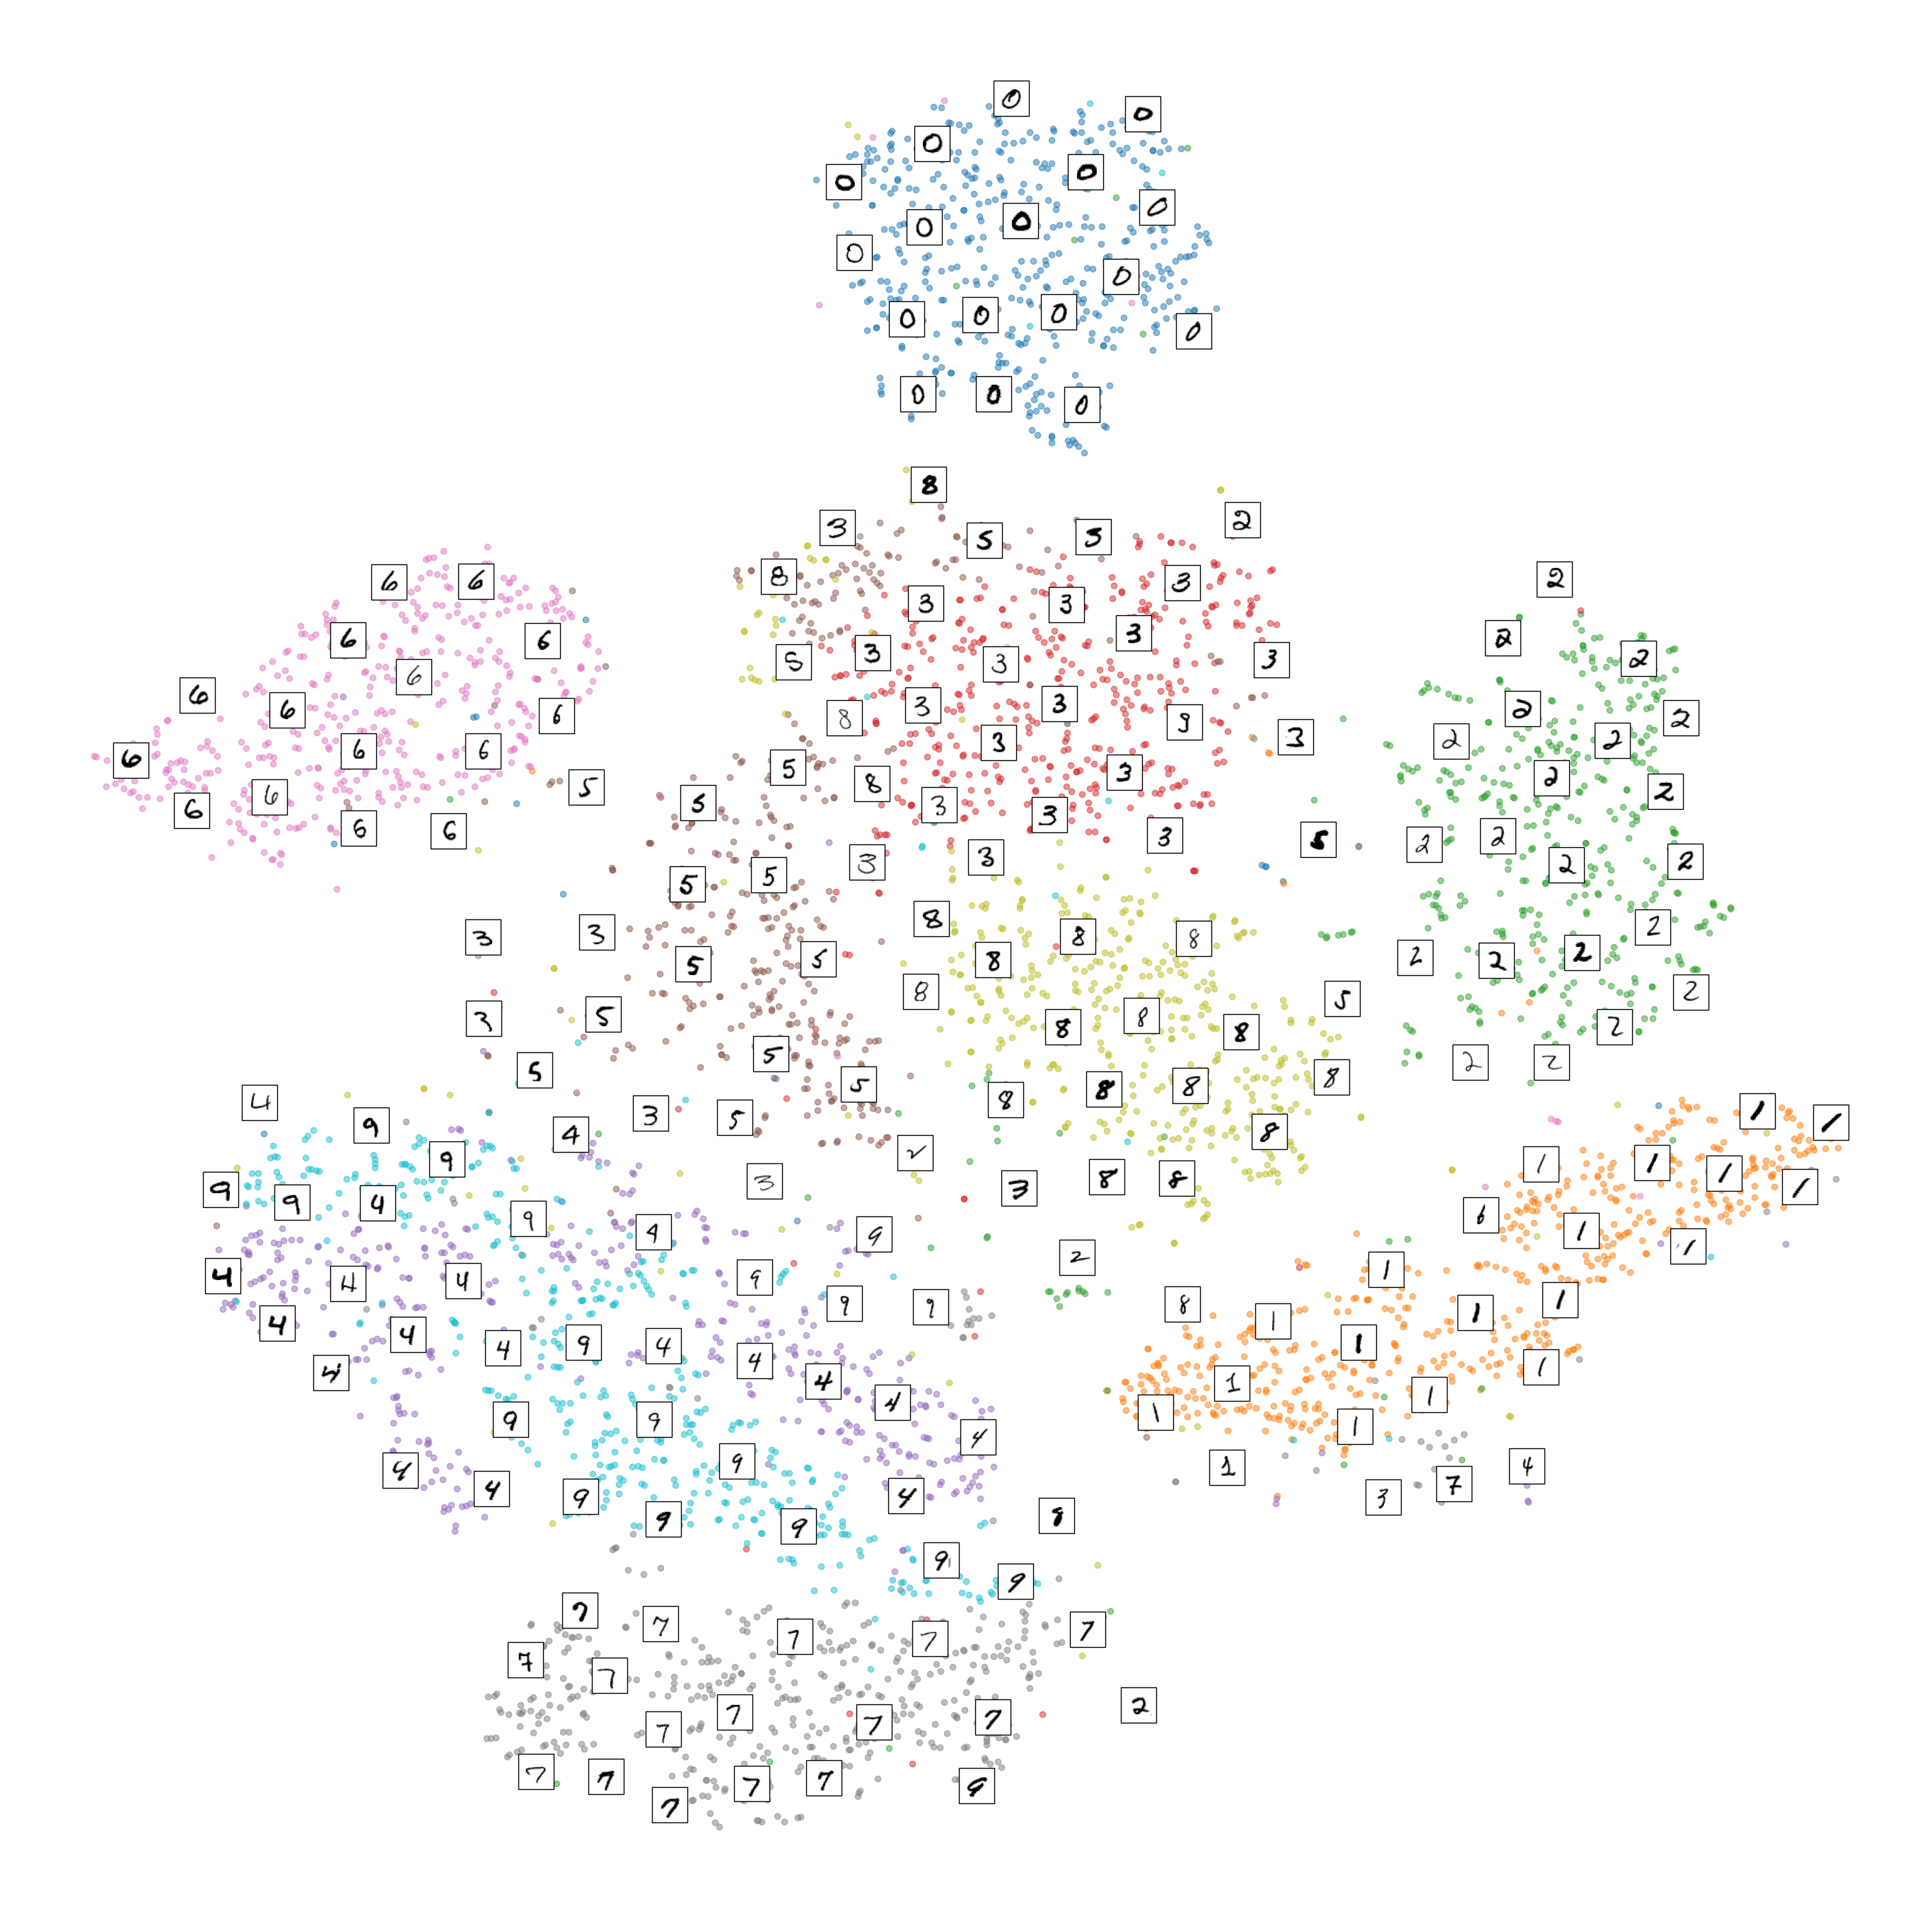

In [64]:
plot_digits(X_trainS_reduced,y_trainS,images=X_trainS,figsize=(35,35))

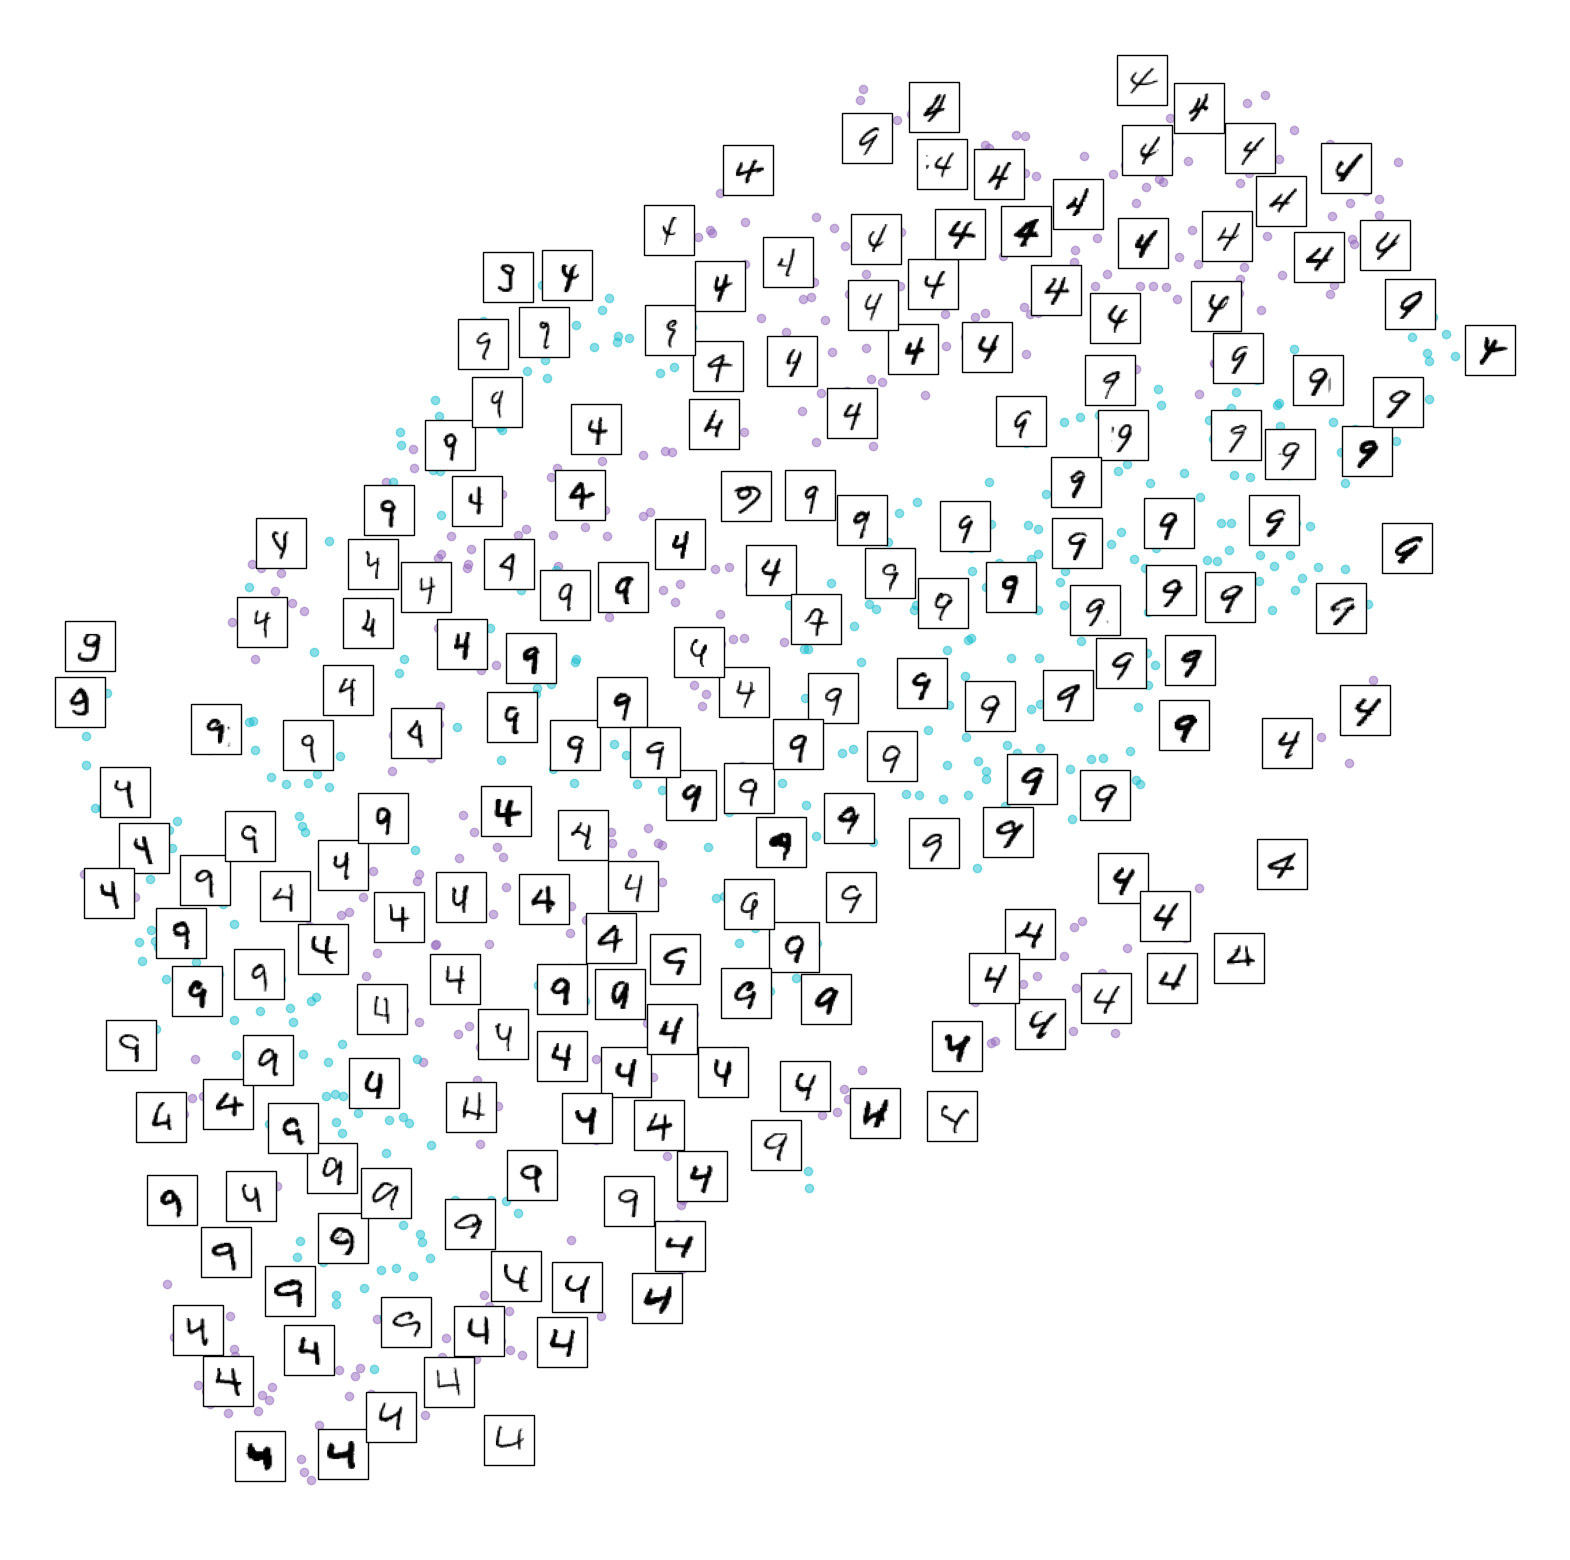

In [67]:
plot_digits(X_trainSS,y_trainSS,images=X_trainS[idx],figsize=(20,20))

CPU times: user 418 ms, sys: 97.8 ms, total: 516 ms
Wall time: 299 ms


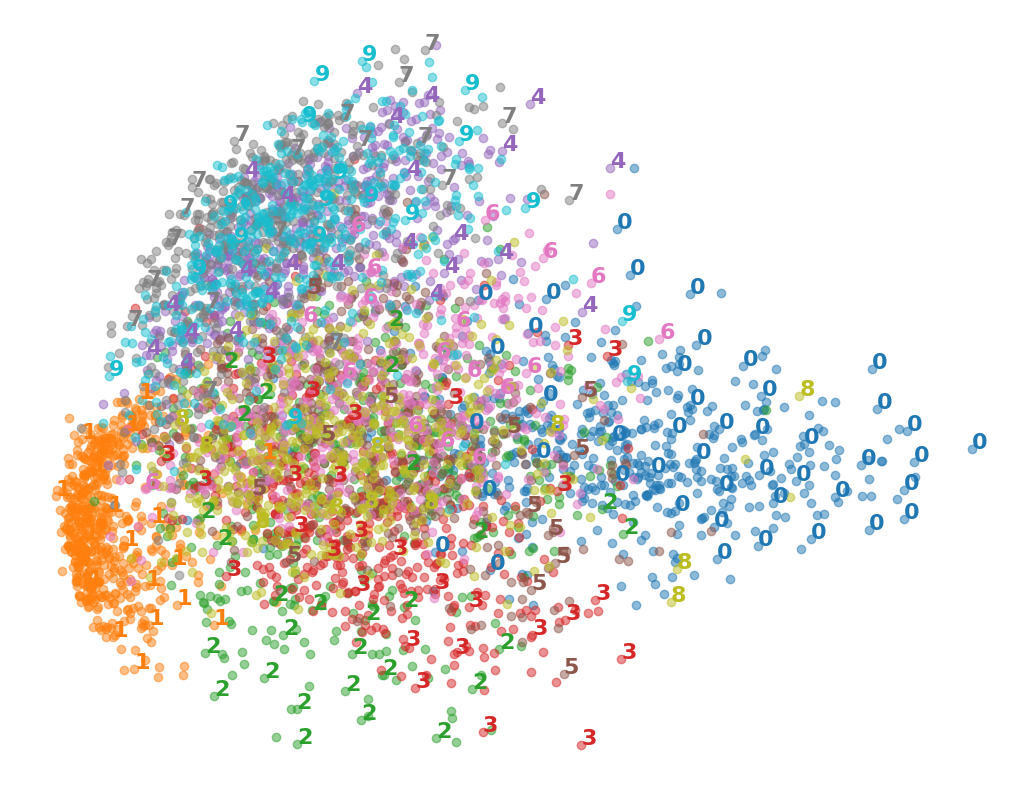

In [69]:
pca = PCA(n_components=2,random_state=42)
%time X_pca_reduced = pca.fit_transform(X_trainS)
plot_digits(X_pca_reduced,y_trainS)
plt.show()

CPU times: user 7.31 s, sys: 3.34 s, total: 10.7 s
Wall time: 7.58 s


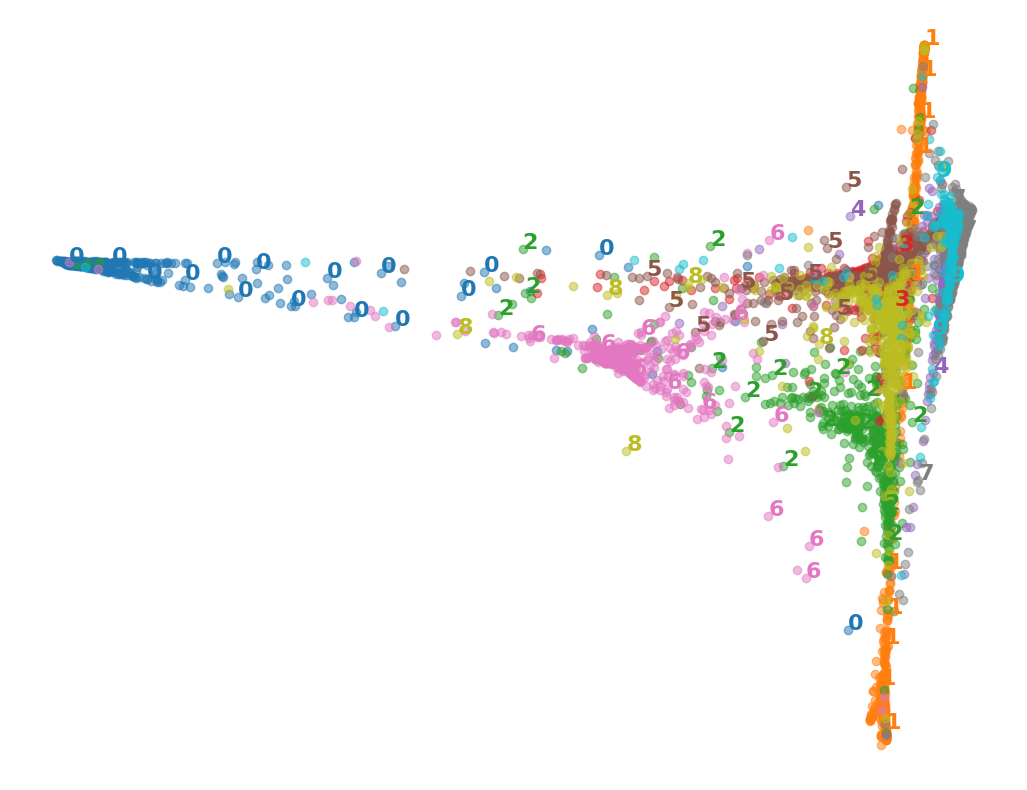

In [70]:
lle = LocallyLinearEmbedding(n_components=2,random_state=42)
%time X_lle_reduced = lle.fit_transform(X_trainS)
plot_digits(X_lle_reduced,y_trainS)
plt.show()

CPU times: user 7.15 s, sys: 2.84 s, total: 9.99 s
Wall time: 5.4 s


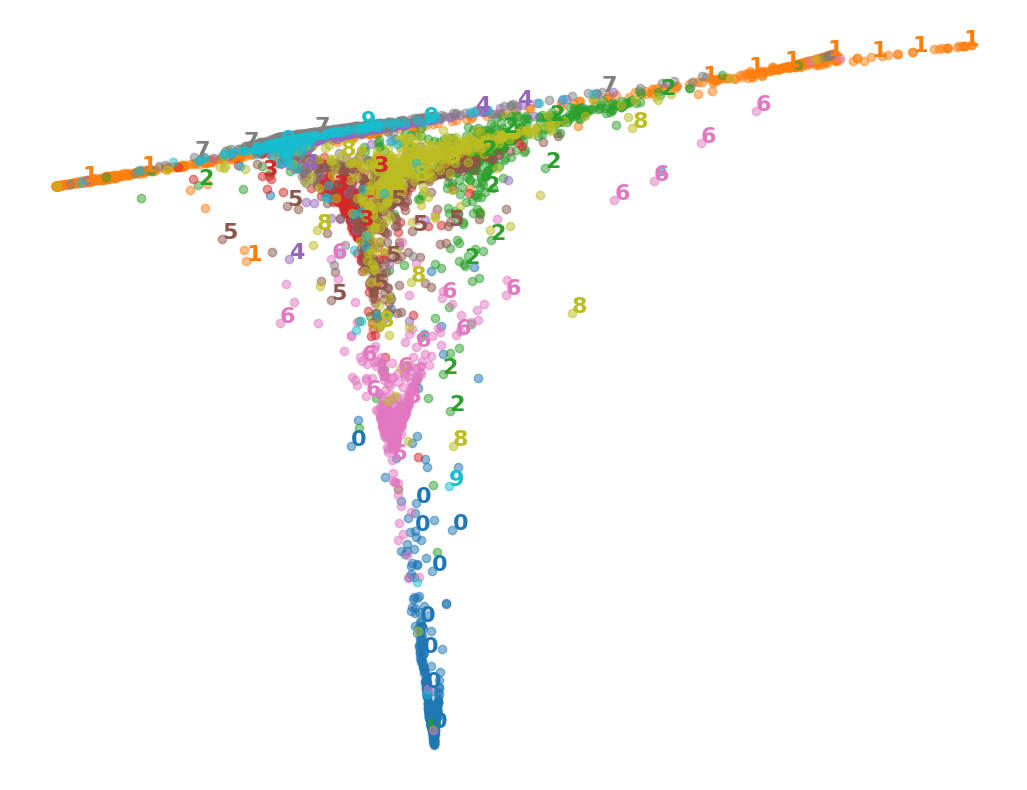

In [73]:
pca_lle = make_pipeline(PCA(n_components=.95,random_state=42),LocallyLinearEmbedding(n_components=2,random_state=42))
%time X_pca_lle = pca_lle.fit_transform(X_trainS)
plot_digits(X_pca_lle,y_trainS)
plt.show()

Warning, the following two cells will take about 10-30 minutes to run, depending on hardware:

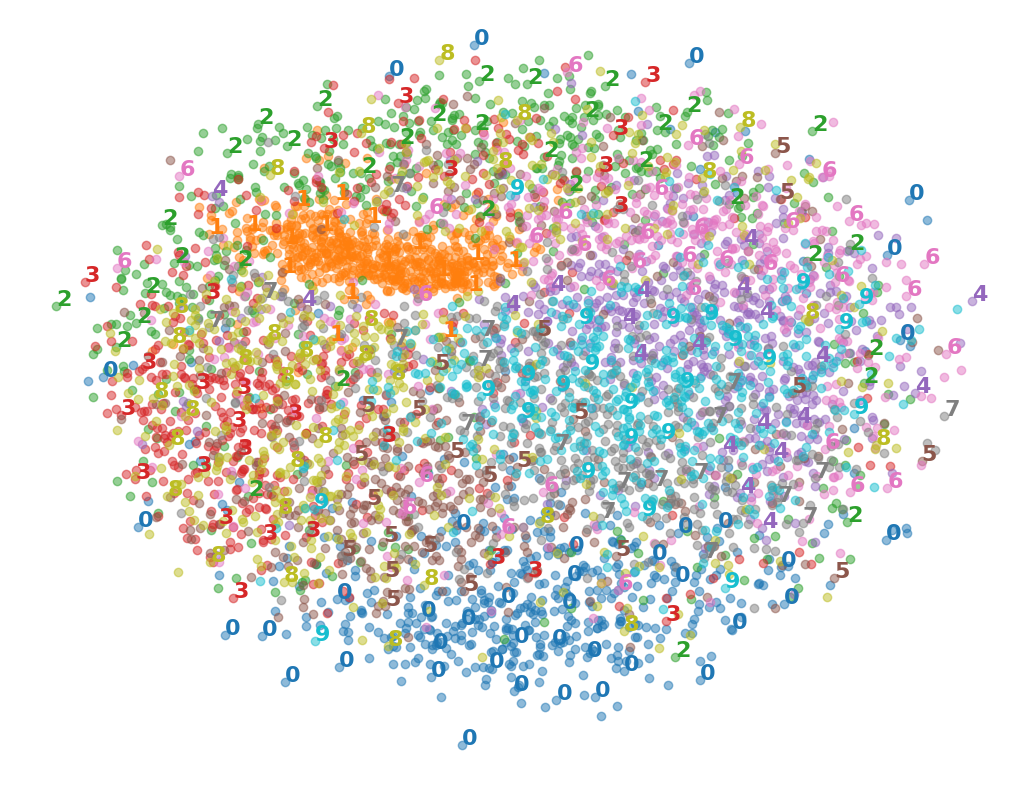

In [75]:
%time X_mds_reduced = MDS(n_components=2, normalized_stress=False, random_state=42).fit_transform(X_trainS)
plot_digits(X_mds_reduced, y_trainS)
plt.show()

CPU times: user 10min 42s, sys: 5min 50s, total: 16min 32s
Wall time: 12min 58s


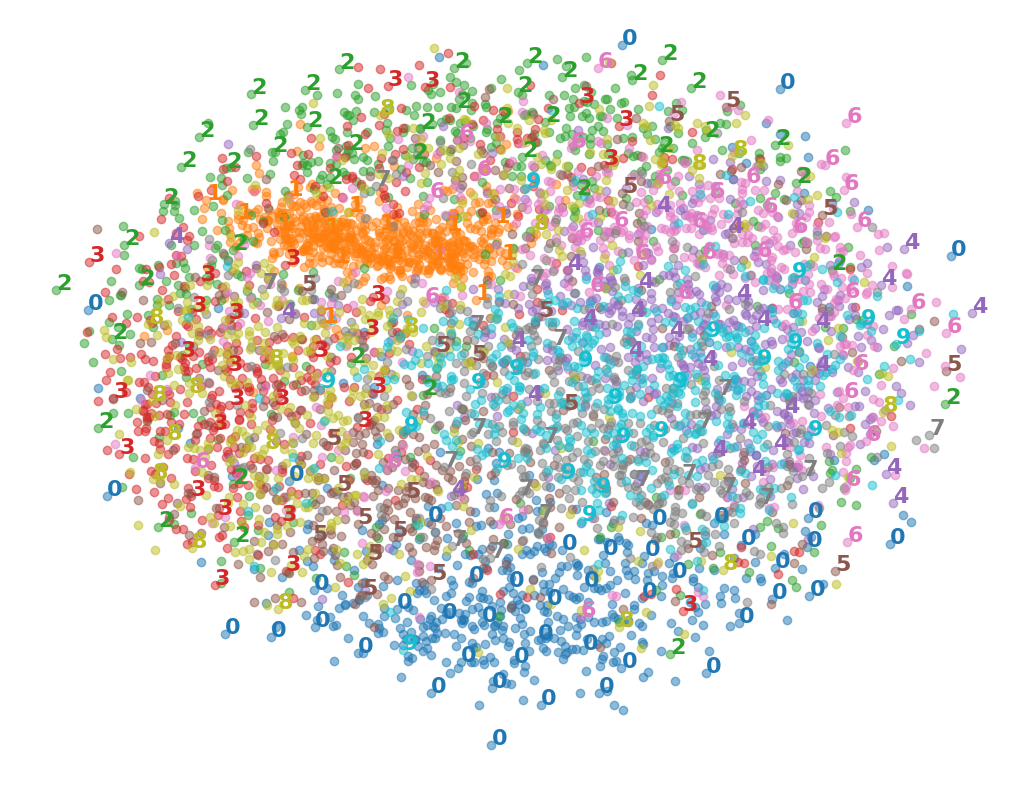

In [76]:
pca_mds = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    MDS(n_components=2, normalized_stress=False, random_state=42)
)

%time X_pca_mds_reduced = pca_mds.fit_transform(X_trainS)
plot_digits(X_pca_mds_reduced, y_trainS)
plt.show()

CPU times: user 2.24 s, sys: 274 ms, total: 2.51 s
Wall time: 1.4 s


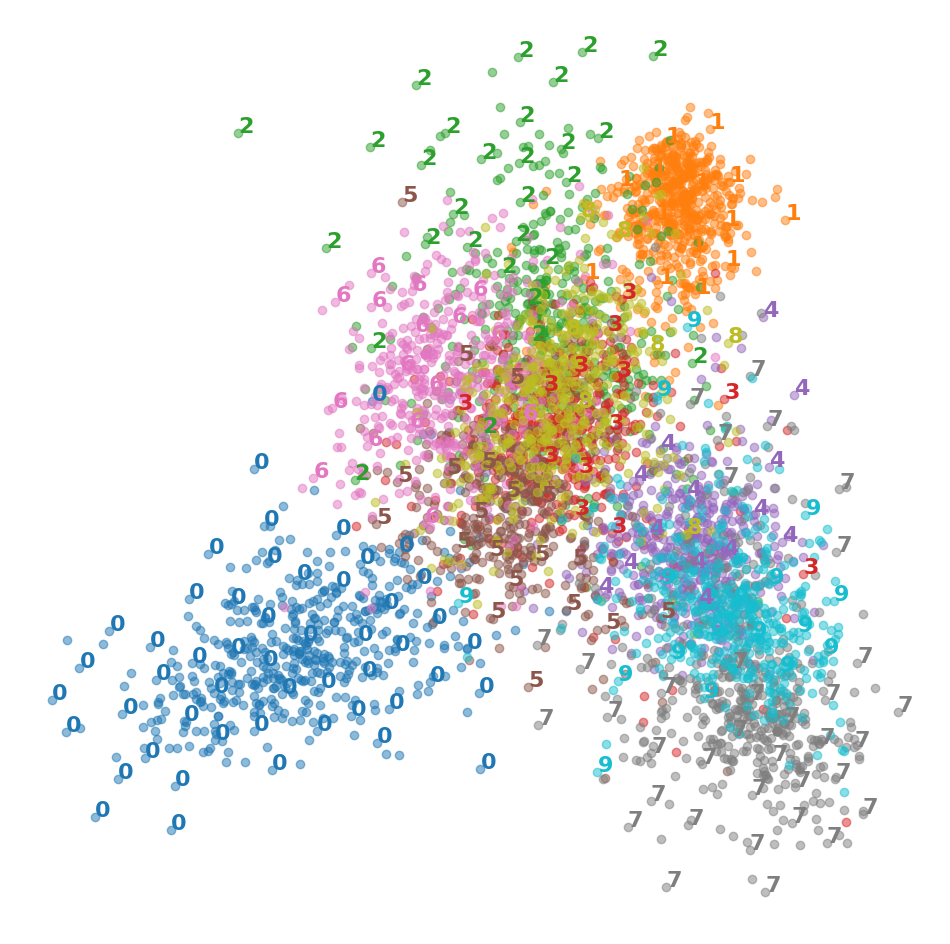

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_trainS, y_trainS)
plot_digits(X_lda_reduced, y_trainS, figsize=(12, 12))
plt.show()

> From All experments above **T-SNE** is the best in this notebook and fast as well, on the otherhand **MDS** not very great for this task (not fast, not seperating the instances well)